In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

import os
import pickle

In [192]:
path = "../data/"
os.listdir(path)

['swes-numpy-0-M180-N90-T50-1-h',
 'swes-numpy-2-M180-N90-T50-1-v',
 'swes-numpy-0-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T5-1-u',
 'swes-numpy-0-M180-N90-T50-1-u',
 'swes-numpy-1-M180-N90-T20-1-h',
 'swes-numpy-2-M180-N90-T15-1-u',
 'swes-numpy-3-M180-N90-T20-1-v',
 'swes-numpy-2-M180-N90-T15-1-h',
 'swes-numpy-3-M180-N90-T5-1-v',
 'swes-numpy-1-M180-N90-T20-1-u',
 'swes-numpy-0-M180-N90-T5-D1-A0-v',
 'swes-numpy-3-M180-N90-T50-1-v',
 'swes-numpy-1-M180-N90-T50-1-h',
 'swes-numpy-2-M180-N90-T5-1-v',
 'swes-numpy-1-M180-N90-T50-1-u',
 'swes-numpy-2-M180-N90-T20-1-v',
 'swes-numpy-0-M180-N90-T20-1-h',
 'swes-numpy-1-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T20-1-u',
 'swes-numpy-1-M180-N90-T5-1-u',
 'swes-numpy-2-M180-N90-T50-1-u',
 'swes-numpy-0-M180-N90-T50-1-v',
 'swes-numpy-0-M180-N90-T5-1-v',
 'swes-numpy-2-M180-N90-T50-1-h',
 'swes-numpy-2-M180-N90-T15-1-v',
 'swes-numpy-3-M180-N90-T5-1-h',
 'swes-numpy-3-M180-N90-T20-1-u',
 'swes-numpy-1-M180-N90-T20-1-v',
 'swes-numpy-3-M180

In [193]:
# unpickle the data
test_case = "3"
run_time = "T50"

h_data = pickle.load(
    open(path + "swes-numpy-" + test_case + "-M180-N90-" + run_time + "-1-h", "rb")
)
u_data = pickle.load(
    open(path + "swes-numpy-" + test_case + "-M180-N90-" + run_time + "-1-u", "rb")
)
v_data = pickle.load(
    open(path + "swes-numpy-" + test_case + "-M180-N90-" + run_time + "-1-v", "rb")
)

t = h_data[2]
phi = h_data[3][1:-1, :]
theta = h_data[4][1:-1, :]
phi1d = phi[:, 0]
theta1d = theta[0, :]
h = h_data[5]
u = u_data[5]
v = v_data[5]
u_mag = np.sqrt(u ** 2 + v ** 2)

print(phi.shape, theta.shape, h.shape)

(181, 92) (181, 92) (181, 92, 3861)


(0.0, 6.283185307179586)

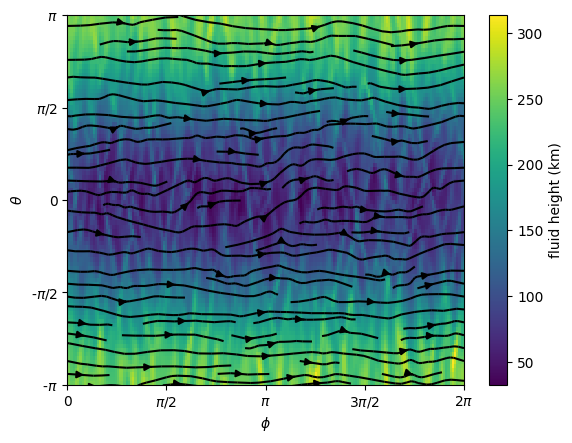

In [194]:
timestep = -1
quiver_stride = 5
plt.pcolormesh(phi, theta, h[:, :, timestep]/1e3)
# color bar with label
cbar = plt.colorbar()
cbar.set_label("fluid height (km)")

# plt.quiver(
#     phi[::quiver_stride, ::quiver_stride],
#     theta[::quiver_stride, ::quiver_stride],
#     u[::quiver_stride, ::quiver_stride, timestep],
#     v[::quiver_stride, ::quiver_stride, timestep],
# )

plt.streamplot(
    phi.T,
    theta.T,
    u[:, :, timestep].T,
    v[:, :, timestep].T,
    color="k",
)

plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\phi$")
plt.xticks(
    np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
)
plt.xlim(0, 2 * np.pi)

In [195]:
print(theta[0, :])

[-3.17649924 -3.10668607 -3.0368729  -2.96705973 -2.89724656 -2.82743339
 -2.75762022 -2.68780705 -2.61799388 -2.54818071 -2.47836754 -2.40855437
 -2.3387412  -2.26892803 -2.19911486 -2.12930169 -2.05948852 -1.98967535
 -1.91986218 -1.85004901 -1.78023584 -1.71042267 -1.6406095  -1.57079633
 -1.50098316 -1.43116999 -1.36135682 -1.29154365 -1.22173048 -1.15191731
 -1.08210414 -1.01229097 -0.9424778  -0.87266463 -0.80285146 -0.73303829
 -0.66322512 -0.59341195 -0.52359878 -0.45378561 -0.38397244 -0.31415927
 -0.2443461  -0.17453293 -0.10471976 -0.03490659  0.03490659  0.10471976
  0.17453293  0.2443461   0.31415927  0.38397244  0.45378561  0.52359878
  0.59341195  0.66322512  0.73303829  0.80285146  0.87266463  0.9424778
  1.01229097  1.08210414  1.15191731  1.22173048  1.29154365  1.36135682
  1.43116999  1.50098316  1.57079633  1.6406095   1.71042267  1.78023584
  1.85004901  1.91986218  1.98967535  2.05948852  2.12930169  2.19911486
  2.26892803  2.3387412   2.40855437  2.47836754  2.

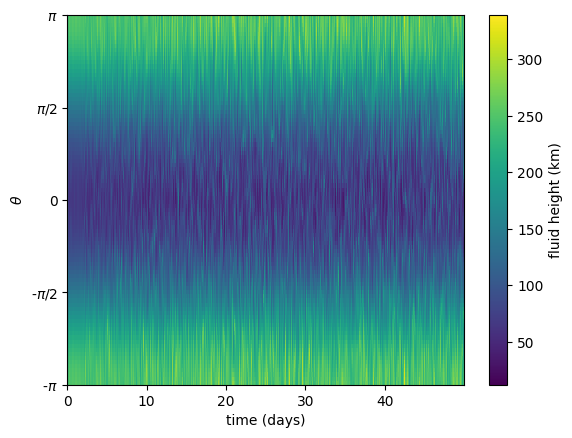

In [196]:
# hovmöller diagram along phi = 0

# find index closest to phi = 0
phi_0 = np.argmin(np.abs(phi[0, :]))
plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)

plt.xlabel("time (days)")

plt.pcolormesh(t[:, 0] / 3600 / 24, theta[0, :], h[phi_0, :, :] / 1e3)
# plt.pcolormesh(t[:,0]/3600,theta[0,:], np.mean(h[:, :, :], axis=0))
cbar = plt.colorbar()
cbar.set_label("fluid height (km)")

In [197]:
def plt_toroid(theta,phi,h):
    aspect_ratio = 0.4
    c, a = 1, aspect_ratio
    x = (c + a * np.cos(theta)) * np.cos(phi)
    y = (c + a * np.cos(theta)) * np.sin(phi)
    z = a * np.sin(theta)

    fig = plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(121, projection="3d")
    ax1.set_zlim(-1, 1)
    my_col = cm.plasma(h)
    ax1.plot_surface(
        x, y, z, rstride=1, cstride=1, facecolors=my_col, linewidth=0, antialiased=False
    )
    ax1.view_init(40, 10)
    # hide axis
    ax1.set_axis_off()
    # aspect ratio
    ax1.set_aspect("equal")
    # zoom in
    ax1.dist = 7

    return fig, ax1

/var/folders/38/2bzdl5412qz7lzzz021kxyf80000gp/T/ipykernel_56417/1344326177.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 7


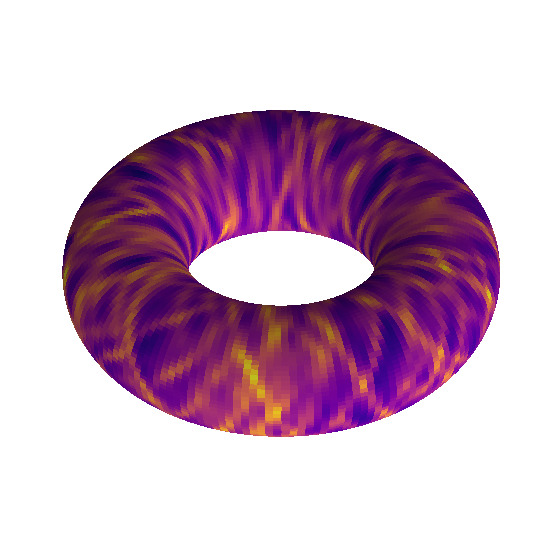

In [198]:
timestep = -1
h_ts = h[:, :, timestep]
# normalize h from 0 to 1
h_mean = np.mean(h_ts, axis=0)
# deviation from mean
h_deviation = h_ts - h_mean
# normalize from 0 to 1
h_norm = (h_deviation - np.min(h_deviation)) / (
    np.max(h_deviation) - np.min(h_deviation)
)

plt_toroid(theta,phi,h_norm)


plt.savefig("toroidal_fluid.png", dpi=300, bbox_inches="tight")

/var/folders/38/2bzdl5412qz7lzzz021kxyf80000gp/T/ipykernel_56417/1344326177.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 7


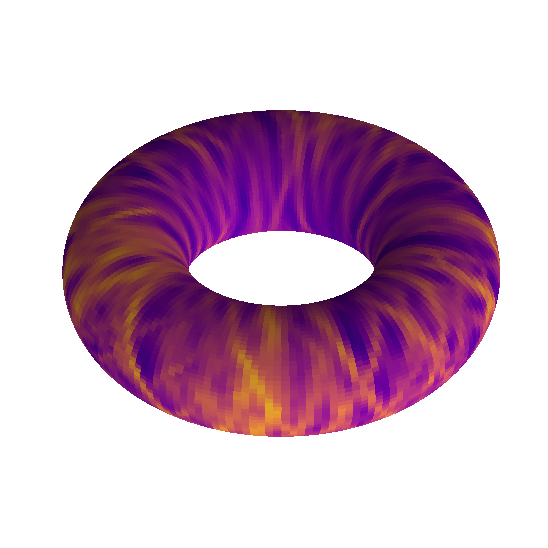

In [199]:

u_mag_ts = u_mag[:, :, timestep]
# normalize from 0 to 1
u_mag_ts = (u_mag_ts - np.min(u_mag_ts)) / (np.max(u_mag_ts) - np.min(u_mag_ts))

fig, ax = plt_toroid(theta,phi,u_mag_ts)

plt.savefig("toroidal_fluid_u.png", dpi=300, bbox_inches="tight")

Text(0.5, 1.0, 'Mean fluid height')

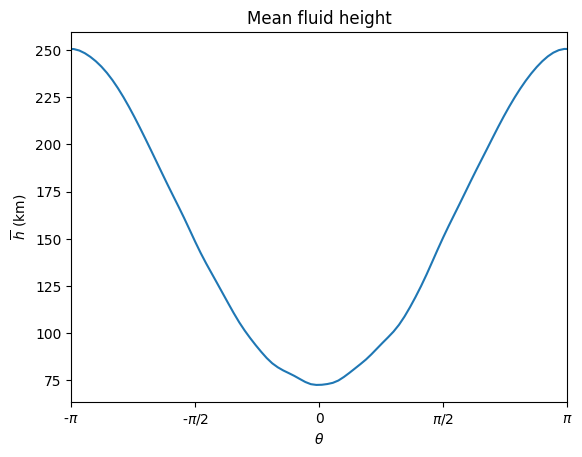

In [200]:
plt.plot(theta1d, h_mean/1e3, label="20d equilibrium")
h0 = 1.5e5
h_equilibrium_shape = -0.6*np.cos(theta1d)
h_equilibrium = h0 * h_equilibrium_shape + 2*h0
plt.xlabel(r"$\theta$")
plt.xticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.xlim(-np.pi, np.pi)

plt.ylabel(r"$\overline{h}$ (km)")
plt.title(r"Mean fluid height")

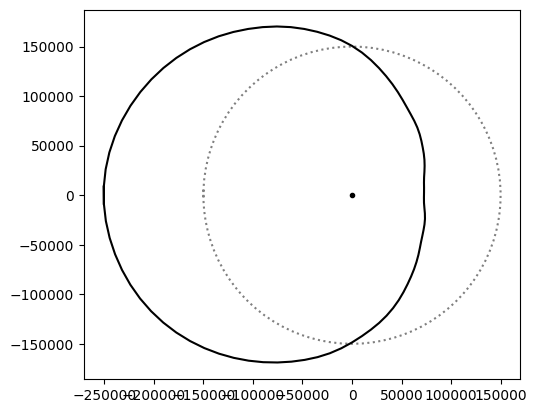

In [201]:
# crosssection of the torus mean water height

plt.plot(np.cos(theta1d) * h0, np.sin(theta1d) * h0, "k:", alpha=0.5)
plt.plot(np.cos(theta1d) * h_mean, np.sin(theta1d) * h_mean, "k-")
plt.plot(0, 0, "k.")

# equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")